In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#przedział funkcji
a = -4 * math.pi
b = 3 * math.pi
#liczba punktów na wykresach i przy obliczaniu błędów
points = 1000

In [4]:
def func_plot(fn, a, b, n, label='', color='', figsize=(6, 4), subplot=None, title=''):
    if subplot is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        ax = subplot
    xs = np.linspace(a, b, num=n)
    ys = [fn(xi) for xi in xs]
    if color:
        ax.plot(xs, ys, label=label, color=color)
    else:
        ax.plot(xs, ys, label=label)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if label:
        ax.legend(loc="best")
    if title:
        ax.set_title(title)

In [5]:
def create_compare_errors_table(data):
    df = pd.DataFrame(data, index=["Błąd bezwzględny", "Błąd średniokwadratowy"])
    return df

In [6]:
def max_absolute_error(f, W, xs):
    return max([abs(f(x) - W(x)) for x in xs])

In [7]:
def mse(f, W, xs):
    return sum([(f(x) - W(x)) ** 2 for x in xs]) / len(xs)

In [8]:
def mse_approximation(xs, ys, m,w=[]):
    n = len(xs)
    if not w:
        w = [1 for _ in range(n)]
    A = np.array([[sum(w[i]*xs[i]**(j+k) for i in range(n)) for k in range(m+1)] for j in range(m+1)])
    B = np.array([sum(w[i]*ys[i]*xs[i]**j for i in range(n)) for j in range(m+1)])
    factors = np.linalg.solve(A,B)

    return lambda x: sum(factors[i]*x**i for i in range(m+1))

In [9]:
def display_approximation(f,a,b,n,m, approximation, w=[], label='', title=''):
    xs = np.linspace(a,b, points)
    xs_approximation = np.linspace(a,b,n)
    ys_approximation = [f(x) for x in xs_approximation]
    fig, ax = plt.subplots(figsize=(6, 4))
    func_plot(f, a, b, 1000, label="f(x)", subplot=ax)
    ax.plot(xs_approximation, ys_approximation, 'o', c="r")
    approximation_func = approximation(xs_approximation, ys_approximation, m, w=w)
    func_plot(approximation_func, a, b, 1000, label=label, title=title, subplot=ax)
    plt.show()
    display(create_compare_errors_table({"Aproksymacja średniokwadratowa":[max_absolute_error(f, approximation_func ,
                                                                                              xs), mse(f,
                                                                                                             approximation_func ,xs)]}))


In [10]:
f = lambda x, k=4, m=1: math.exp(-k * math.sin(m * x)) + k * math.sin(m * x) - 1

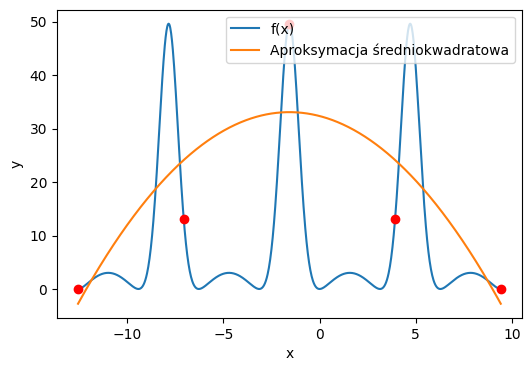

,Aproksymacja średniokwadratowa
Błąd bezwzględny,32.359180
Błąd średniokwadratowy,404.458977


In [11]:
display_approximation(f, a,b,5,3, mse_approximation, label="Aproksymacja średniokwadratowa")